# Implement astropy Bayesian Blocks

In [6]:
%matplotlib inline
from importlib import reload
import main, light_curve
import corner
import warnings
warnings.filterwarnings('error')

In [7]:
cdata = main.Main('3C 279',  interval=1, mjd_range=None,        
                 weight_file='/nfs/farm/g/glast/g/catalog/pointlike/curr/uw9011/3C279_weights.pkl')

Source 3C 279 at: (l,b)=(305.104,57.062); ROI radius=5
Loading data from 127 months 
	Selected 246775 photons within 5 deg of  (305.10,57.06)
	Dates: 2008-08-04 15:51 - 2018-08-01 19:25
	MJD  : 54682.7          - 58331.8         
Default binning: 3649 intervals of 1 days, in range (54683.0, 58332.0)
Adding weights from file /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P8_10years/uw9011/3C279_weights.pkl
	2334 / 243421 photon pixels are outside weight region
	62381 weights set to NaN


In [8]:
reload(light_curve)
bb = light_curve.BayesianBlocks(cdata)

%time bw =  bb.partition()

Selected 3565 / 3649 with exposure > 0.1
Partitioned data into 224 blocks, using FitnessFunc class <class 'light_curve.BayesianBlocks.partition.<locals>.MyEvents'>
CPU times: user 1.43 s, sys: 1e+03 µs, total: 1.43 s
Wall time: 1.43 s


In [4]:
lc =bb.light_curve(bw)

Loaded 223 / 224 cells with exposure > 0.01 for light curve analysis
Fits using representation poisson: 223 intervals
  columns: ['t', 'tw', 'fexp', 'flux', 'errors', 'limit', 'ts', 'poiss'] 


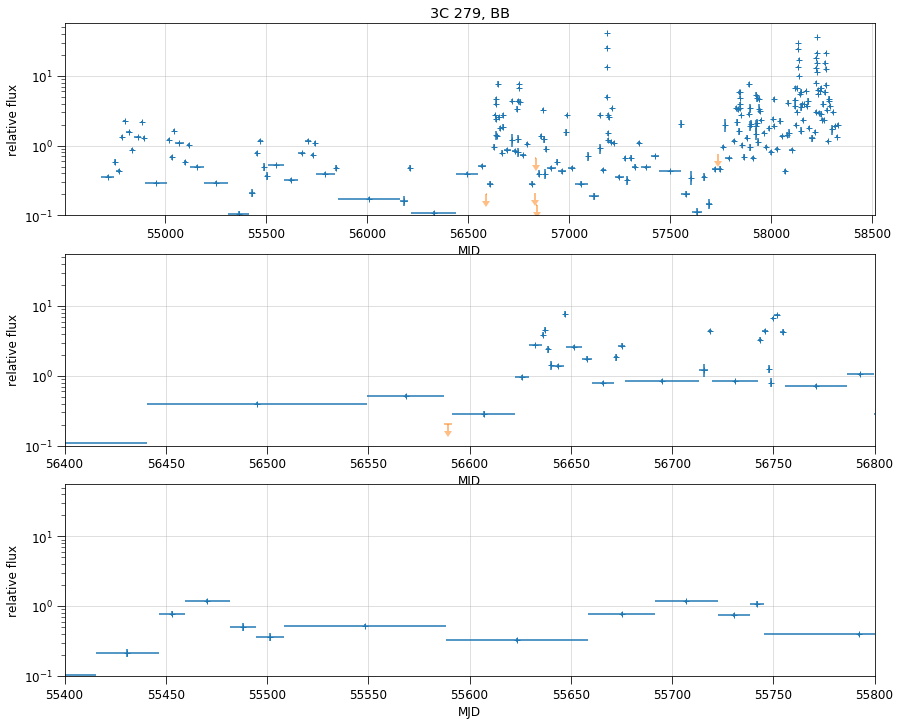

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,12))
lc.flux_plot(ax=ax1, yscale='log', ylim=(0.1,None), title='3C 279, BB');
lc.flux_plot(ax=ax2, yscale='log', ylim=(0.1,None), xlim=(56400, 56800), title=' ')
lc.flux_plot(ax=ax3, yscale='log', ylim=(0.1,None), xlim=(55400, 55800), title=' ');